In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import brown
from tools import *
%matplotlib inline

# Ch5 分类和标注词汇

1.  什么是词汇分类，在自然语言处理中它们如何使用？
2.  对于存储词汇和它们的分类来说什么是好的 Python 数据结构？
3.  如何自动标注文本中每个词汇的词类？

-   词性标注（parts-of-speech tagging，POS tagging）：简称标注。将词汇按照它们的词性（parts-of-speech，POS）进行分类并对它们进行标注
-   词性：也称为词类或者词汇范畴。
-   标记集：用于特定任务标记的集合。

## Sec 5.2 标注语料库

### 5.2.1 表示已经标注的标识符

In [2]:
# 5.2.1 表示已经标注的标识符
# str2tuple() 将已经标注的字符串转换成元组
taggen_token = nltk.tag.str2tuple('fly/NN')
print("taggen_token= ",taggen_token)
print("taggen_token[0]= ",taggen_token[0])
print("taggen_token[1]= ", taggen_token[1])

taggen_token=  ('fly', 'NN')
taggen_token[0]=  fly
taggen_token[1]=  NN


In [3]:
# 拆分已经标注的语料文本为元组
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

print("sent.split()= ", sent.split())
split_sent_to_tuple = [nltk.tag.str2tuple(t) for t in sent.split()]
show_subtitle("split_sent_to_tuple")
print(split_sent_to_tuple)

sent.split()=  ['The/AT', 'grand/JJ', 'jury/NN', 'commented/VBD', 'on/IN', 'a/AT', 'number/NN', 'of/IN', 'other/AP', 'topics/NNS', ',/,', 'AMONG/IN', 'them/PPO', 'the/AT', 'Atlanta/NP', 'and/CC', 'Fulton/NP-tl', 'County/NN-tl', 'purchasing/VBG', 'departments/NNS', 'which/WDT', 'it/PPS', 'said/VBD', '``/``', 'ARE/BER', 'well/QL', 'operated/VBN', 'and/CC', 'follow/VB', 'generally/RB', 'accepted/VBN', 'practices/NNS', 'which/WDT', 'inure/VB', 'to/IN', 'the/AT', 'best/JJT', 'interest/NN', 'of/IN', 'both/ABX', 'governments/NNS', "''/''", './.']
--------------- >split_sent_to_tuple< ---------------
[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), 

### 5.2.2 读取已经标注的语料库

In [4]:
# 打开brown语料库的ca01文件，可以看到下面的内容：
# The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at
# investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd
# ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.
# 这个是已经标注好的语料库，可以使用函数tagged_words()直接读取

# tagset='universal' 使用通用标注集进行词类标注
show_subtitle("brown.tagged_words()")
print(brown.tagged_words())
show_subtitle("brown.tagged_words(tagset='universal')")
print(brown.tagged_words(tagset='universal'))

--------------- >brown.tagged_words()< ---------------
[('The', 'AT'), ('Fulton', 'NP-TL'), ...]
--------------- >brown.tagged_words(tagset='universal')< ---------------
[('The', 'DET'), ('Fulton', 'NOUN'), ...]


In [5]:
show_subtitle("nltk.corpus.treebank.tagged_words()")
print(nltk.corpus.treebank.tagged_words())
show_subtitle("nltk.corpus.treebank.tagged_words(tagset='universal')")
print(nltk.corpus.treebank.tagged_words(tagset='universal'))

--------------- >nltk.corpus.treebank.tagged_words()< ---------------
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]
--------------- >nltk.corpus.treebank.tagged_words(tagset='universal')< ---------------
[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]


In [6]:
show_subtitle("nltk.corpus.nps_chat.tagged_words()")
print(nltk.corpus.nps_chat.tagged_words())
show_subtitle("nltk.corpus.nps_chat.tagged_words(tagset='universal')")
print(nltk.corpus.nps_chat.tagged_words(tagset='universal'))

--------------- >nltk.corpus.nps_chat.tagged_words()< ---------------
[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]
--------------- >nltk.corpus.nps_chat.tagged_words(tagset='universal')< ---------------
[('now', 'ADV'), ('im', 'PRON'), ('left', 'VERB'), ...]


In [7]:
show_subtitle("nltk.corpus.conll2000.tagged_words()")
print(nltk.corpus.conll2000.tagged_words(tagset='universal'))
show_subtitle("nltk.corpus.conll2000.tagged_words()")
print(nltk.corpus.conll2000.tagged_words(tagset='universal'))

--------------- >nltk.corpus.conll2000.tagged_words()< ---------------
[('Confidence', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ...]
--------------- >nltk.corpus.conll2000.tagged_words()< ---------------
[('Confidence', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ...]


In [8]:
# Note:以下的都无法正常转换为通用标注集
# 因为每个语言的标注集都是根据自己的情况定义的，不与通用标注集完全相同

show_subtitle("nltk.corpus.sinica_treebank.tagged_words()")
print(nltk.corpus.sinica_treebank.tagged_words())
show_subtitle("nltk.corpus.sinica_treebank.tagged_words(tagset='universal')")
# print(nltk.corpus.sinica_treebank.tagged_words(tagset='universal'))

--------------- >nltk.corpus.sinica_treebank.tagged_words()< ---------------
[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]
--------------- >nltk.corpus.sinica_treebank.tagged_words(tagset='universal')< ---------------


In [9]:
show_subtitle("nltk.corpus.indian.tagged_words()")
print(nltk.corpus.indian.tagged_words())
show_subtitle("nltk.corpus.indian.tagged_words(tagset='universal')")
# print(nltk.corpus.indian.tagged_words(tagset='universal'))

--------------- >nltk.corpus.indian.tagged_words()< ---------------
[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]
--------------- >nltk.corpus.indian.tagged_words(tagset='universal')< ---------------


In [10]:
show_subtitle("nltk.corpus.mac_morpho.tagged_words()")
print(nltk.corpus.mac_morpho.tagged_words())
show_subtitle("nltk.corpus.mac_morpho.tagged_words(tagset='universal')")
# print(nltk.corpus.mac_morpho.tagged_words(tagset='universal'))

--------------- >nltk.corpus.mac_morpho.tagged_words()< ---------------
[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]
--------------- >nltk.corpus.mac_morpho.tagged_words(tagset='universal')< ---------------


In [11]:
show_subtitle("nltk.corpus.cess_cat.tagged_words()")
print(nltk.corpus.cess_cat.tagged_words())
show_subtitle("nltk.corpus.cess_cat.tagged_words(tagset='universal')")
# print(nltk.corpus.cess_cat.tagged_words(tagset='universal'))

--------------- >nltk.corpus.cess_cat.tagged_words()< ---------------
[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]
--------------- >nltk.corpus.cess_cat.tagged_words(tagset='universal')< ---------------


In [12]:
# 使用tagged_sents()可以直接把语料库分割成句子，而不是将所有的词表示成一个链表，句子中的词同样进行了词类标注。
# 因为开发的自动标注器需要在句子链表上进行训练和测试，而不是在词链表上。
show_subtitle("brown.tagged_sents()[0]")
print(brown.tagged_sents()[0])
show_subtitle("brown.tagged_sents()[1]")
print(brown.tagged_sents()[1])

--------------- >brown.tagged_sents()[0]< ---------------
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
--------------- >brown.tagged_sents()[1]< ---------------
[('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 

### 5.2.3 A Universal Part-of-Speech Tagset, 一个通用的（简化的）标注集
http://www.nltk.org/book/ch05.html Table2.1 （比书P200 表5-1还要简单）

| Tag  | Meaning             | English Examples                       |
| ---- | ------------------- | -------------------------------------- |
| Tag  | Meaning             | English Examples                       |
| ADJ  | adjective           | new, good, high, special, big, local   |
| ADP  | adposition          | on, of, at, with, by, into, under      |
| ADV  | adverb              | really, already, still, early, now     |
| CONJ | conjunction         | and, or, but, if, while, although      |
| DET  | determiner, article | the, a, some, most, every, no, which   |
| NOUN | noun                | year, home, costs, time, Africa        |
| NUM  | numeral             | twenty-four, fourth, 1991, 14:24       |
| PRT  | particle            | at, on, out, over per, that, up, with  |
| PRON | pronoun             | he, their, her, its, my, I, us         |
| VERB | verb                | is, say, told, given, playing, would   |
| .    | punctuation marks   | . , ; !                                |
| X    | other               | ersatz, esprit, dunno, gr8, univeristy |

list(tag_fd)=  ['NOUN', 'VERB', 'ADP', '.', 'DET', 'ADJ', 'ADV', 'CONJ', 'PRON', 'PRT', 'NUM', 'X']
tag_fd.keys()=  dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])
tag_fd.most_common()=  [('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]
--------------- >tag_fd.tabulate()< ---------------
 NOUN  VERB   ADP     .   DET   ADJ   ADV  CONJ  PRON   PRT   NUM     X 
30654 14399 12355 11928 11389  6706  3349  2717  2535  2264  2166    92 


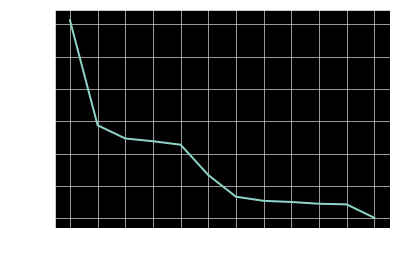

In [13]:
# 布朗语料库的新闻类中哪些标记最常见
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print("list(tag_fd)= ", list(tag_fd))
print("tag_fd.keys()= ",tag_fd.keys())
print("tag_fd.most_common()= ",tag_fd.most_common())
show_subtitle("tag_fd.tabulate()")
tag_fd.tabulate()
tag_fd.plot()

In [14]:
# 图形化的POS一致性工具，可以用来寻找任一词和POS标记的组合
# 例如："VERB VERB" 或者 "was missing" 或者 "had VERB" 或者 "DET money" 等等
nltk.app.concordance()

### 5.2.4 名词
名词：一般指人、地点、事情和概念。可能出现在限定词和形容词之后，可以是动词的主语或者宾语。

表5-2 名词的句法模式

fdist.most_common()=  [('NOUN', 7959), ('DET', 7373), ('ADJ', 4761), ('ADP', 3781), ('.', 2796), ('VERB', 1842), ('CONJ', 938), ('NUM', 894), ('ADV', 186), ('PRT', 94), ('PRON', 19), ('X', 11)]
tag_list=  ['NOUN', 'DET', 'ADJ', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']


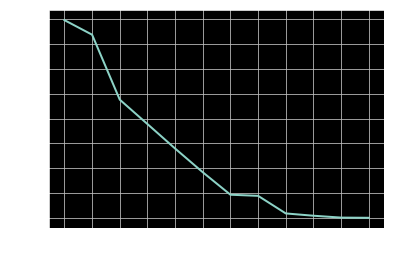

In [15]:
# 统计构成二元模型（W1，W2）中W2=‘NOUN’的W1的词性的比例
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
word_tag_pairs = nltk.bigrams(brown_news_tagged)  # 构建双词链表
noun_precedes = [
        a[1]
        for (a, b) in word_tag_pairs
        if b[1] == 'NOUN'
]
fdist = nltk.FreqDist(noun_precedes)
print("fdist.most_common()= ", fdist.most_common())
tag_list = [
        tag
        for (tag, _) in fdist.most_common()
]
print("tag_list= ", tag_list)
fdist.plot()
# 结论：名词最容易出现在名词后面
# 其次是出现在限定词和形容词之后，包括数字形容词（即数词，标注为NUM）

# 5.2.5 动词
动词：描述事件和行动的词。在句子中，动词通常表示涉及一个或多个名词短语所指示物的关系。

表5-3 动词的句法模式

In [16]:
# 找出新闻文本中最常见的动词（频率分布中计算的项目是词——标记对）
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
show_subtitle("word_tag_fd.most_common(20)")
print(word_tag_fd.most_common(20))
word_tag_list = [
        wt[0]
        for (wt, _) in word_tag_fd.most_common()
        if wt[1] == 'VERB'
]
show_subtitle("word_tag_list[:20]")
print(word_tag_list[:20])

# 对做过一次频率统计的输出的结果再做一次频率统计结果不变
fdist = nltk.FreqDist(word_tag_fd)
show_subtitle("fdist.most_common(20)")
print(fdist.most_common(20))
# fdist.plot(cumulative=True)   # 不能执行，会死机，因为动词单词数目太多

--------------- >word_tag_fd.most_common(20)< ---------------
[((',', '.'), 4885), (('the', 'DET'), 4038), (('.', '.'), 3828), (('of', 'ADP'), 2319), (('to', 'PRT'), 2161), (('a', 'DET'), 1874), (('in', 'ADP'), 1554), (('and', 'CONJ'), 1505), (('*-1', 'X'), 1123), (('0', 'X'), 1099), (('*', 'X'), 965), (('for', 'ADP'), 815), (('*T*-1', 'X'), 806), (("'s", 'PRT'), 761), (('*U*', 'X'), 744), (('$', '.'), 718), (('The', 'DET'), 713), (('``', '.'), 702), (("''", '.'), 684), (('is', 'VERB'), 671)]
--------------- >word_tag_list[:20]< ---------------
['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may']
--------------- >fdist.most_common(20)< ---------------
[((',', '.'), 4885), (('the', 'DET'), 4038), (('.', '.'), 3828), (('of', 'ADP'), 2319), (('to', 'PRT'), 2161), (('a', 'DET'), 1874), (('in', 'ADP'), 1554), (('and', 'CONJ'), 1505), (('*-1', 'X'), 1123), (('0', 'X'), 1099), (('*', 'X'), 965), (('

fdist.most_common()=  [('NOUN', 4240), ('VERB', 2292), ('X', 1354), ('PRON', 1329), ('PRT', 1291), ('ADV', 1093), ('.', 1040), ('CONJ', 355), ('DET', 346), ('ADP', 82), ('ADJ', 77), ('NUM', 65)]
--------------- >fdist.tabulate()< ---------------
NOUN VERB    X PRON  PRT  ADV    . CONJ  DET  ADP  ADJ  NUM 
4240 2292 1354 1329 1291 1093 1040  355  346   82   77   65 


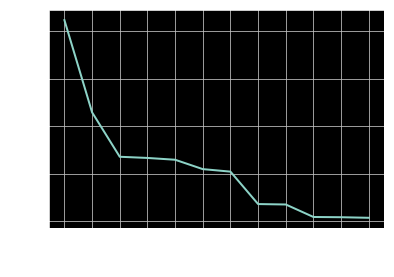

In [17]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_pairs = nltk.bigrams(wsj)
verb_preceders = [
        a[1]
        for (a, b) in word_tag_pairs
        if b[1] == 'VERB'
]
fdist = nltk.FreqDist(verb_preceders)
print("fdist.most_common()= ", fdist.most_common())
show_subtitle("fdist.tabulate()")
fdist.tabulate()
fdist.plot()
# 结论：动词出现在名词、动词、名字和副词后面。

In [18]:
# 因为词汇和标记是成对的
# 所以把词汇作为条件，把标记作为事件，使用条件——事件对的链表初始化条件频率分布。
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
cfd1 = nltk.ConditionalFreqDist(wsj)
print("list(cfd1)[:20]= ", list(cfd1)[:20])
print("cfd1['yield'].most_common(20)= ", cfd1['yield'].most_common(20))
print("cfd1['cut'].most_common(20)= ", cfd1['cut'].most_common(20))
# 动词太多，执行时间过长，显示效果不好
# cfd1.tabulate()
# cfd1.plot()

list(cfd1)[:20]=  ['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.', 'Mr.', 'is', 'chairman']
cfd1['yield'].most_common(20)=  [('VERB', 28), ('NOUN', 20)]
cfd1['cut'].most_common(20)=  [('VERB', 25), ('NOUN', 3)]


In [19]:
# 也可以颠倒配对，把标记作为条件，词汇作为事件，生成条件频率分布，就可以直接查找标记对应哪些词了。
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print("cfd2= ", cfd2)
print("cfd2['VBN']= ", cfd2['VBN'])
show_subtitle("cfd2['VBN'].most_common(20)")
print(cfd2['VBN'].most_common(20))
show_subtitle("list(cfd2['VBN'].keys())[:20]")
print(list(cfd2['VBN'].keys())[:20])
show_subtitle("cfd2['VBN'].most_common(20)")
print(cfd2['VBN'].most_common(20))
show_subtitle("in")
print("'been' in cfd2['VBN'].keys()= ", 'been' in cfd2['VBN'].keys())

cfd2=  <ConditionalFreqDist with 46 conditions>
cfd2['VBN']=  <FreqDist with 692 samples and 2134 outcomes>
--------------- >cfd2['VBN'].most_common(20)< ---------------
[('been', 150), ('expected', 52), ('made', 33), ('compared', 32), ('based', 31), ('used', 26), ('priced', 26), ('sold', 25), ('named', 20), ('designed', 20), ('held', 18), ('fined', 18), ('taken', 16), ('paid', 15), ('traded', 15), ('increased', 14), ('said', 14), ('filed', 13), ('reached', 13), ('called', 13)]
--------------- >list(cfd2['VBN'].keys())[:20]< ---------------
['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought']
--------------- >cfd2['VBN'].most_common(20)< ---------------
[('been', 150), ('expected', 52), ('made', 33), ('compared', 32), ('based', 31), ('used', 26), ('priced', 26), ('sold', 25), ('named', 20), ('designed', 20), ('held', 1

In [20]:
# 尝试分辨VD（过去式）和VN（过去分词）之间的区别
# 先找出同是VD和VN的词汇，然后分析它们的上下文区别
wsj = nltk.corpus.treebank.tagged_words()
cfd3 = nltk.ConditionalFreqDist(wsj)
# cfd.conditions() 返回所有的条件构成的链表，等价于list(cfd1.keys())返回所有的关键字。
show_subtitle("cfd3.conditions()[:20]")
print(cfd3.conditions()[:20])
show_subtitle("list(cfd3.keys())[:20]")
print(list(cfd3.keys())[:20])
# 寻找既可以作为 VBD 还可以作为 VBN 的单词
word_list = [
        w
        for w in cfd3.conditions()
        if 'VBD' in cfd3[w] and 'VBN' in cfd3[w]
]
show_subtitle("word_list[:20]")
print(word_list[:20])
# kicked 作为 VBD 的示例句子
idx1 = wsj.index(('kicked', 'VBD'))
show_subtitle("idx1")
print(' '.join(word for word, tag in wsj[idx1 - 10:idx1 + 10]))
# kicked 作为 VBN 的示例句子
idx2 = wsj.index(('kicked', 'VBN'))
show_subtitle("idx2")
print(' '.join(word for word, tag in wsj[idx2 - 10:idx2 + 10]))

--------------- >cfd3.conditions()[:20]< ---------------
['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.', 'Mr.', 'is', 'chairman']
--------------- >list(cfd3.keys())[:20]< ---------------
['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.', 'Mr.', 'is', 'chairman']
--------------- >word_list[:20]< ---------------
['named', 'used', 'caused', 'reported', 'said', 'stopped', 'heard', 'studied', 'led', 'replaced', 'sold', 'worked', 'died', 'found', 'rejected', 'imposed', 'made', 'dumped', 'imported', 'mixed']
--------------- >idx1< ---------------
stock 0 they had *T*-1 . While program trades swiftly kicked in , a `` circuit breaker '' that *T*-1
--------------- >idx2< ---------------
-- the first time 0 a head of state has kicked off an issue at the Big Board here *T*-1


### 5.2.6 其他词类
（形容词、副词、介词、冠词（限定词）、情态动词、人称代词）
-   形容词：修饰名词，可以作为修饰符 或 谓语。
-   副词：修饰动词，指定时间、方式、地点或动词描述的事件发展方向；修饰形容词。

### 5.2.7 未简化的标记(P204)

In [21]:
# Ex5-1 找出最频繁的名词标记的程序
def find_tags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist(
            (tag, word)
            for (word, tag) in tagged_text
            if tag.startswith(tag_prefix))
    return dict(
            (tag, cfd[tag].most_common(5))
            for tag in cfd.conditions()
    )


brown_tagged_words = brown.tagged_words(categories='news')
tag_dict = find_tags('NN', brown_tagged_words)
for tag in sorted(tag_dict):
    print(tag, tag_dict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

### 5.2.8 探索已经标注的语料库

In [22]:
# 观察 often 后面的词汇
brown_learned_text = brown.words(categories='learned')
print(sorted(set(
        b
        for (a, b) in nltk.bigrams(brown_learned_text)
        if a == 'often'
)))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [23]:
brown_learned_tagged = brown.tagged_words(categories='learned', tagset='universal')
brown_learned_bigrams = nltk.bigrams(brown_learned_tagged)
print("brown_learned_bigrams= ",brown_learned_bigrams)
a_b_list = [
        (a, b)
        for (a, b) in brown_learned_bigrams
]
show_subtitle("a_b_list")
print(a_b_list[:20])

brown_learned_bigrams=  <generator object bigrams at 0x00000000082C7A40>
--------------- >a_b_list< ---------------
[(('1', 'NUM'), ('.', '.')), (('.', '.'), ('Introduction', 'NOUN')), (('Introduction', 'NOUN'), ('It', 'PRON')), (('It', 'PRON'), ('has', 'VERB')), (('has', 'VERB'), ('recently', 'ADV')), (('recently', 'ADV'), ('become', 'VERB')), (('become', 'VERB'), ('practical', 'ADJ')), (('practical', 'ADJ'), ('to', 'PRT')), (('to', 'PRT'), ('use', 'VERB')), (('use', 'VERB'), ('the', 'DET')), (('the', 'DET'), ('radio', 'NOUN')), (('radio', 'NOUN'), ('emission', 'NOUN')), (('emission', 'NOUN'), ('of', 'ADP')), (('of', 'ADP'), ('the', 'DET')), (('the', 'DET'), ('moon', 'NOUN')), (('moon', 'NOUN'), ('and', 'CONJ')), (('and', 'CONJ'), ('planets', 'NOUN')), (('planets', 'NOUN'), ('as', 'ADP')), (('as', 'ADP'), ('a', 'DET')), (('a', 'DET'), ('new', 'ADJ'))]


VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


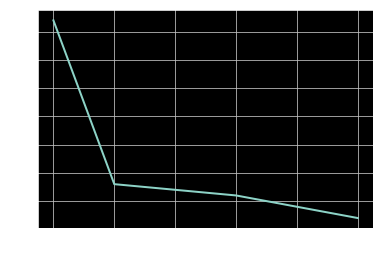

In [24]:
# 观察 often 后面的词汇
tags = [
        b[1]
        for (a, b) in nltk.bigrams(brown_learned_tagged)
        if a[0] == 'often'
]
fd = nltk.FreqDist(tags)
fd.tabulate()
fd.plot()

In [25]:
# P205 Ex5-2 使用POS标记寻找三词短语(<Verb>to<Verb>)
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if t1.startswith('V') and t2 == 'TO' and t3.startswith('V'):
            print(w1, w2, w3)


for i, tagged_sent in enumerate(brown.tagged_sents()):
    if i < 100 and len(tagged_sent) >= 3:
        process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see


In [26]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [
                tag
                for (tag, _) in data[word].most_common()
        ]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [27]:
nltk.app.concordance()

In [28]:
print("data['works']= ", data['works'])
print("data['$1']= ", data['$1'])
print("data['$222']= ", data['$222'])

data['works']=  <FreqDist with 2 samples and 9 outcomes>
data['$1']=  <FreqDist with 1 samples and 5 outcomes>
data['$222']=  <FreqDist with 0 samples and 0 outcomes>


In [29]:
# data.tabulate()  # 执行结果过多，时间过长
show_subtitle("data.conditions()")
print(data.conditions()[:20])

--------------- >data.conditions()< ---------------
['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


In [30]:
show_title("data.values()")
# print(data.values())  # 执行结果过多，时间过长
for i, (cfd_key, cfd_value) in enumerate(zip(data.keys(), data.values())):
    if i < 20:
        show_subtitle(cfd_key)
        for j, fd_value in enumerate(cfd_value.values()):
            print(fd_value, end=',')
        print()

=============== >data.values()< ===============
--------------- >the< ---------------
6386,
--------------- >fulton< ---------------
14,
--------------- >county< ---------------
61,
--------------- >grand< ---------------
18,1,
--------------- >jury< ---------------
46,
--------------- >said< ---------------
406,
--------------- >friday< ---------------
41,
--------------- >an< ---------------
311,
--------------- >investigation< ---------------
11,
--------------- >of< ---------------
2861,
--------------- >atlanta's< ---------------
4,
--------------- >recent< ---------------
20,
--------------- >primary< ---------------
13,4,
--------------- >election< ---------------
41,
--------------- >produced< ---------------
6,
--------------- >``< ---------------
732,
--------------- >no< ---------------
112,8,
--------------- >evidence< ---------------
17,
--------------- >''< ---------------
702,
--------------- >that< ---------------
546,128,150,5,
